## wsi2graph2_v2.py: Plotting the Whole Slide as a Graph

This notebook demonstrates how to plot an entire Whole Slide Image (WSI) as a graph using the `wsi2graph2_v2.py` code.

### Requirements

To generate the graph, the following two inputs are required:

1. **Whole Slide Image (WSI) path**  
   The file path to the original whole slide image.

2. **Patch coordinate file**  
   A file containing the pixel-level coordinates of each extracted patch.  
   In this work, we use patch coordinates generated by the **CLAM framework**.


### Loading the WSI and Patch Coordinate Files

In this cell, we load the required libraries and define the input paths used for graph construction.

- The **Whole Slide Image (WSI)** is loaded using OpenSlide.
- Two different **patch coordinate files** are provided:
  - One generated using a **patch size of 512 × 512**
  - Another generated using a **patch size of 256 × 256**

This allows us to visualize and compare how different patch resolutions affect the spatial graph representation for the *same* WSI.


In [1]:
from openslide import OpenSlide
from PIL import Image
import wsi2graph2_v2 as ws

# Path to the Whole Slide Image (WSI)
wsi_image = "/mnt/vast-kisski/projects/kisski-l3s-caimed-tcga-test/slides/LUSC/TCGA-63-A5MH-01Z-00-DX1.596077FF-9CE1-4EA7-9BB6-222C69872CA4.svs"

# Patch coordinates generated using 512x512 patch size (CLAM)
h5_info_512 = "/mnt/vast-kisski/projects/kisski-l3s-caimed-tcga-test/manish/512/patches/TCGA-63-A5MH-01Z-00-DX1.596077FF-9CE1-4EA7-9BB6-222C69872CA4.h5"

# Patch coordinates generated using 256x256 patch size (CLAM)
h5_info_256 = "/mnt/vast-kisski/projects/kisski-l3s-caimed-tcga-test/slides_patches/patches/TCGA-63-A5MH-01Z-00-DX1.596077FF-9CE1-4EA7-9BB6-222C69872CA4.h5"


/user/m.bhattakapadi/u17196/miniconda3/envs/clam_latest/lib/python3.10/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /mnt/vast-kisski/home/m.bhattakapadi/u17196/miniconda3/envs/clam_latest/lib/python3.10/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "


# Preview of WSI

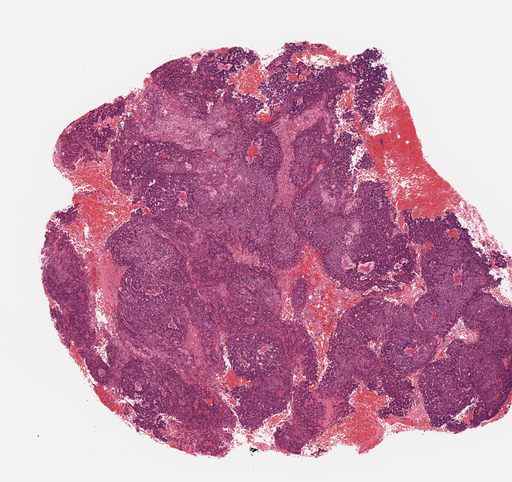

In [2]:
slide = OpenSlide(wsi_image)
thumbnail = slide.get_thumbnail((512, 512))  
thumbnail.show()
slide.close()

# Plotting the graph using 512 * 512 patch sizes

In [3]:
graph = ws.getGraph(wsi_image,h5_info_512, patch_size=512)

INFO:wsi2graph2_v2:WSI to graph construction started for /mnt/vast-kisski/projects/kisski-l3s-caimed-tcga-test/slides/LUSC/TCGA-63-A5MH-01Z-00-DX1.596077FF-9CE1-4EA7-9BB6-222C69872CA4.svs
INFO:wsi2graph2_v2:length of the coordinates: 162
INFO:wsi2graph2_v2:Fast extraction done: 162 nodes created
INFO:wsi2graph2_v2:Graph edge extraction started
INFO:wsi2graph2_v2:Graph edge extraction completed with 575 edges
INFO:wsi2graph2_v2:WSI to graph construction completed successfully


# Graph construction output for 512 patch sizes

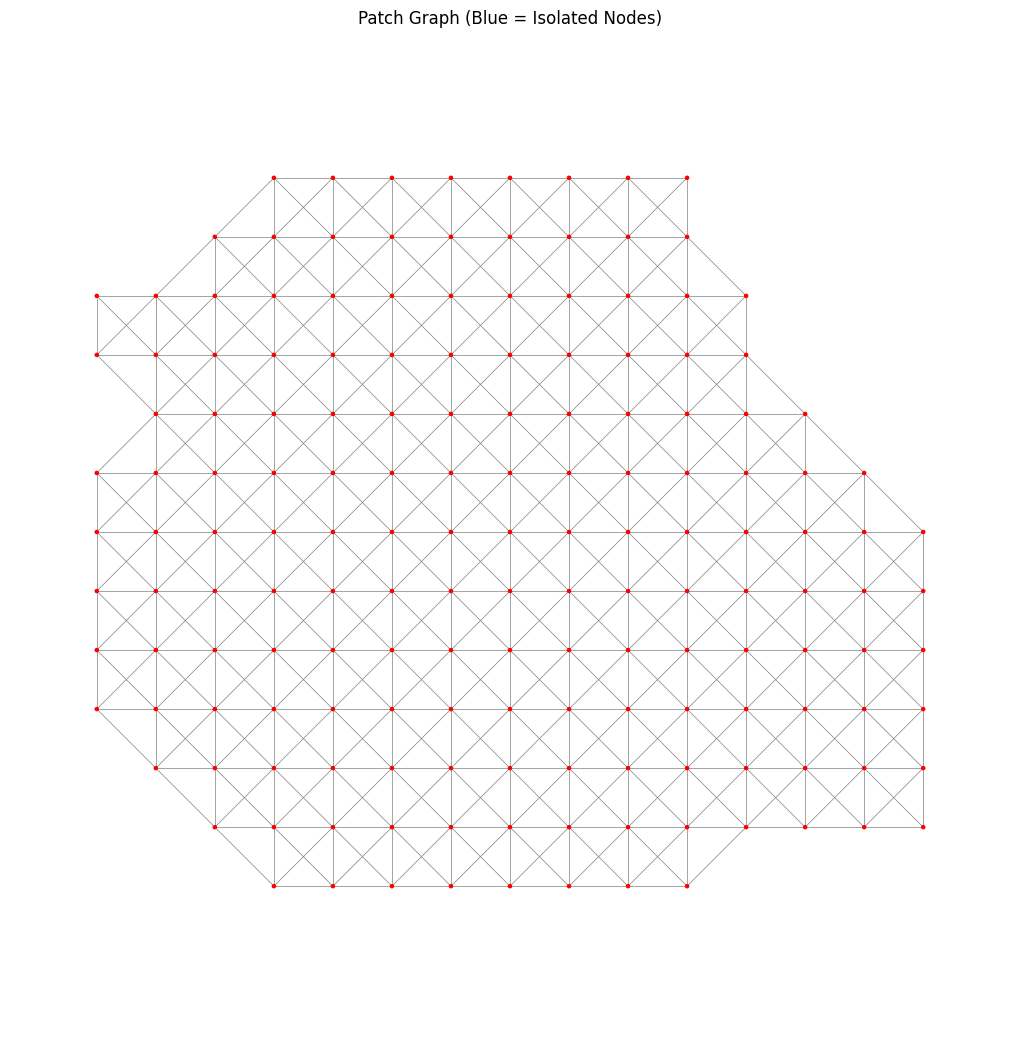

In [4]:
ws.drawGraph2(graph)

# Plotting the graph using 256 * 256 patch sizes

In [5]:
graph = ws.getGraph(wsi_image,h5_info_256, patch_size=256)

INFO:wsi2graph2_v2:WSI to graph construction started for /mnt/vast-kisski/projects/kisski-l3s-caimed-tcga-test/slides/LUSC/TCGA-63-A5MH-01Z-00-DX1.596077FF-9CE1-4EA7-9BB6-222C69872CA4.svs
INFO:wsi2graph2_v2:length of the coordinates: 602
INFO:wsi2graph2_v2:Fast extraction done: 602 nodes created
INFO:wsi2graph2_v2:Graph edge extraction started
INFO:wsi2graph2_v2:Graph edge extraction completed with 2266 edges
INFO:wsi2graph2_v2:WSI to graph construction completed successfully


# Graph construction output for 256 patch sizes

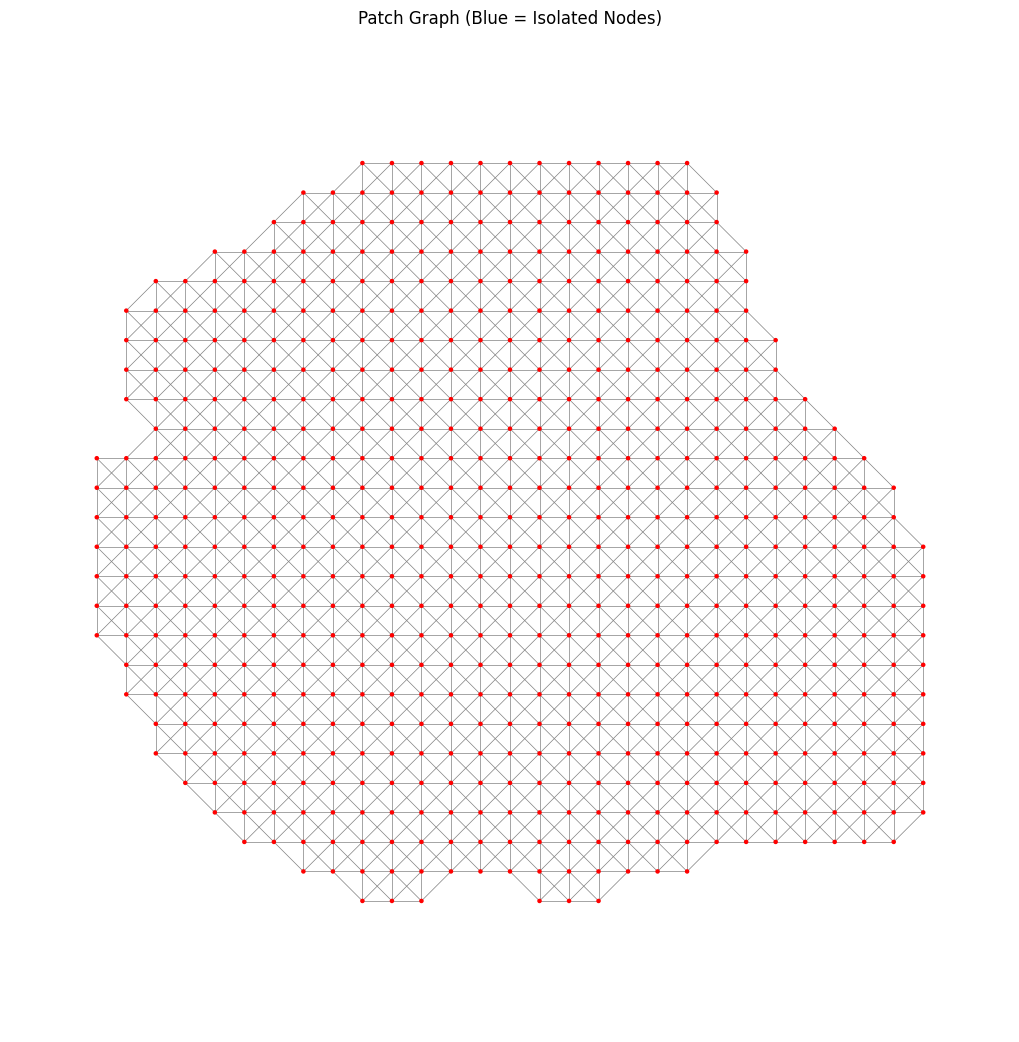

In [6]:
ws.drawGraph2(graph)